In [1]:
import numpy as np
import matplotlib.pyplot as plt

from models.evaluation import utils
from configs.mts_style_transfer_v1.args import AmplitudeShiftArgs as args

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ["TF_USE_LEGACY_KERAS"]="1"
import tensorflow as tf
import numpy as np


/home/henri/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ROOT_FOLDER = "EXPS/EXP_2024-08-10_Improved architecture/amplitude_shift/6.0_6.0"

In [3]:
trained_model_args = utils.get_model_training_arguments(ROOT_FOLDER)
content_encoder, style_encoder, decoder = utils.load_models(ROOT_FOLDER)

args = args()

_, content_valid = utils.load_dset(trained_model_args['dset_content'], args, drop_labels=True, bs=200)
_, style1_valid = utils.load_dset(trained_model_args['dset_style_1'], args, drop_labels=True, bs=200)
_, style2_valid = utils.load_dset(trained_model_args['dset_style_2'], args, drop_labels=True, bs=200)

FileNotFoundError: [Errno 2] No such file or directory: 'EXPS/EXP_2024-08-10_Improved architecture/amplitude_shift/6.0_6.0/model_config.json'

In [ ]:
def draw_arrow(A, B, color="b", width=0.001):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              length_includes_head=True, color=color, width=width, alpha=0.95, head_width=width*4.0)
    
def draw_arrows(xs, ys, color="b"):
    # points = np.stack((xs, ys)).T
    # dist = points[1:] - points[:-1]

    # norms = np.linalg.norm(dist, axis=1)
    # norm = np.mean(norms)

    for i in range(xs.shape[0]-1):
        point0 = [xs[i], ys[i]]
        point1 = [xs[i+1], ys[i+1]]
        draw_arrow(point0, point1, color=color, width=0.00025)


def plot_content_space(content_encoder:tf.keras.Model, dset_content:tf.data.Dataset, dset_style1:tf.data.Dataset, dset_style2:tf.data.Dataset, root_folder:str):

    n_points = 25

    content_batch = next(iter(dset_content))
    style1_batch = next(iter(dset_style1))
    style2_batch = next(iter(dset_style2))

    cs_content = content_encoder(content_batch)
    cs_style1 =  content_encoder(style1_batch)
    cs_style2 =  content_encoder(style2_batch)

    save_to = f'{root_folder}/content_space'
    fig = plt.figure(figsize=(18, 10))
    plt.title("Content Space.")

    draw_arrows(cs_content[0,:n_points,0], cs_content[0,:n_points,1], color="tab:blue")
    plt.scatter(cs_content[0,:n_points,0], cs_content[0,:n_points,1], label='Content Space of Content', color='tab:blue')


    draw_arrows(cs_style1[0,:n_points,0], cs_style1[0,:n_points,1], color='tab:orange')
    plt.scatter(cs_style1[0,:n_points,0], cs_style1[0,:n_points,1], label='Content Space of Style 1', color='tab:orange', alpha=0.5)

    draw_arrows(cs_style2[0,:n_points,0], cs_style2[0,:n_points,1], color='tab:green')
    plt.scatter(cs_style2[0,:n_points,0], cs_style2[0,:n_points,1], label='Content Space of Style 2', color='tab:green', alpha=0.5)

    plt.xlabel('x content')
    plt.ylabel('y content')

    plt.grid()
    plt.legend()
    plt.show()




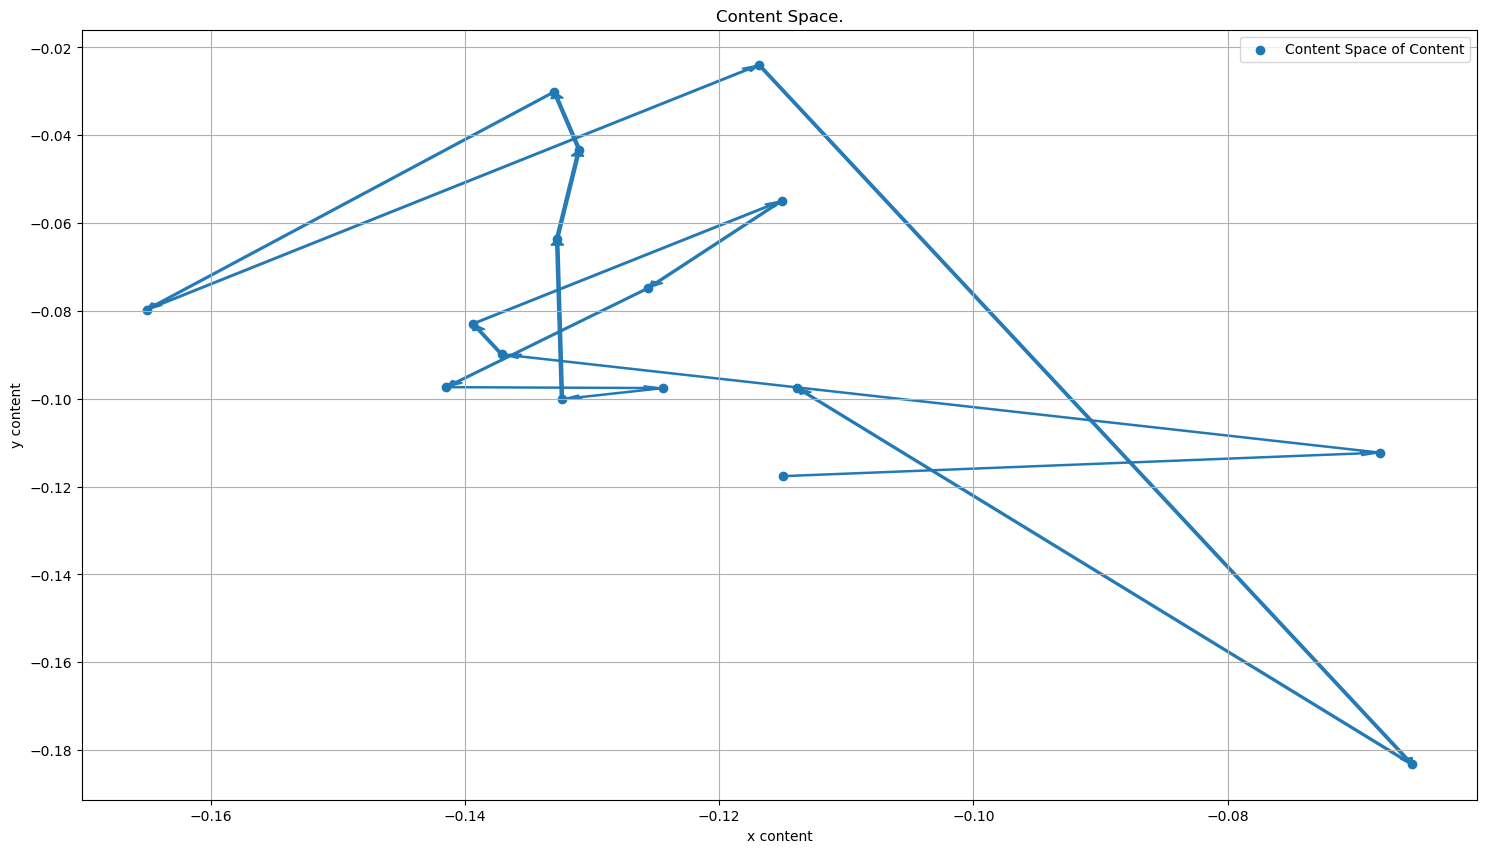

In [ ]:
plot_content_space(content_encoder, content_valid, style1_valid, style2_valid, ROOT_FOLDER)

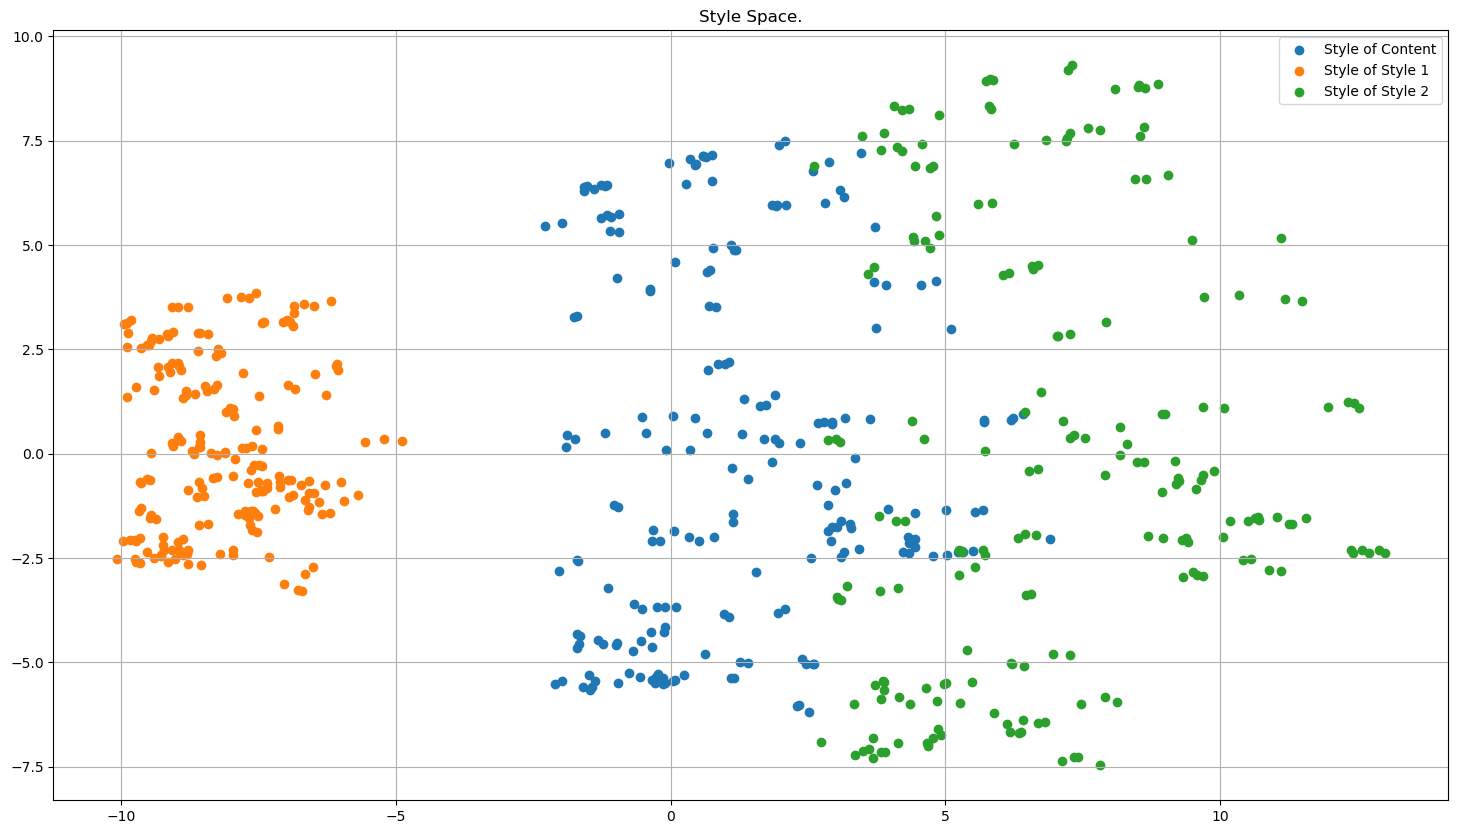

In [ ]:
from sklearn.decomposition import PCA

def plot_style_space(style_encoder:tf.keras.models.Model, dset_content:tf.data.Dataset, dset_s1:tf.data.Dataset, dset_s2:tf.data.Dataset):
    content_batch = next(iter(dset_content))
    style1_batch = next(iter(dset_s1))
    style2_batch = next(iter(dset_s2))

    ss_content = style_encoder(content_batch)
    ss_style1 =  style_encoder(style1_batch)
    ss_style2 =  style_encoder(style2_batch)

    reduder = PCA(2)

    style_vectors = np.vstack(
        [   ss_content, 
            ss_style1, 
            ss_style2
        ])

    reduder.fit(style_vectors)

    content_reduced = reduder.transform(ss_content)
    s1_reduced = reduder.transform(ss_style1)
    s2_reduced = reduder.transform(ss_style2)

    plt.figure(figsize=(18, 10))

    plt.title("Style Space.")

    plt.scatter(content_reduced[:, 0], content_reduced[:, 1], label="Style of Content")
    plt.scatter(s1_reduced[:, 0], s1_reduced[:, 1], label="Style of Style 1")
    plt.scatter(s2_reduced[:, 0], s2_reduced[:, 1], label="Style of Style 2")

    plt.grid()
    plt.legend()
    plt.show()


plot_style_space(style_encoder, content_valid, style1_valid, style2_valid)



In [ ]:
def generate(content_batch, style_batch):
    content = content_encoder(content_batch, training=False)
    style = style_encoder(style_batch, training=False)
    generated = decoder([content, style], training=False)
    generated = tf.concat(generated, -1)
    return generated

In [ ]:
content_batch = next(iter(content_valid))
style2_batch = next(iter(style2_valid))

sequences = generate(content_batch, style2_batch)

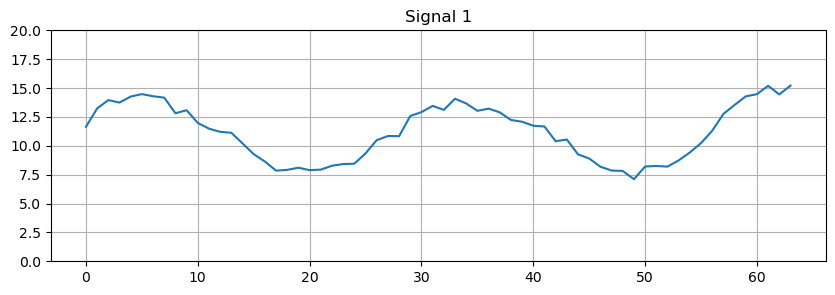

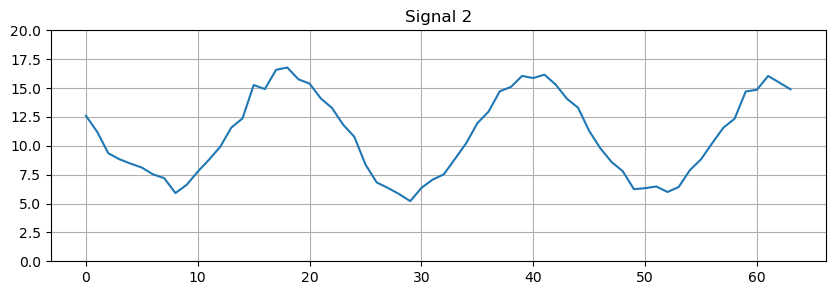

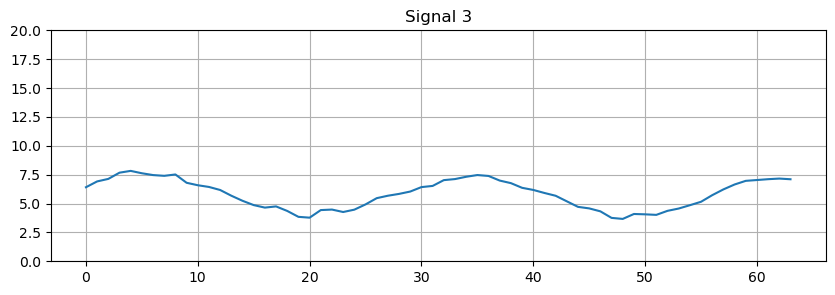

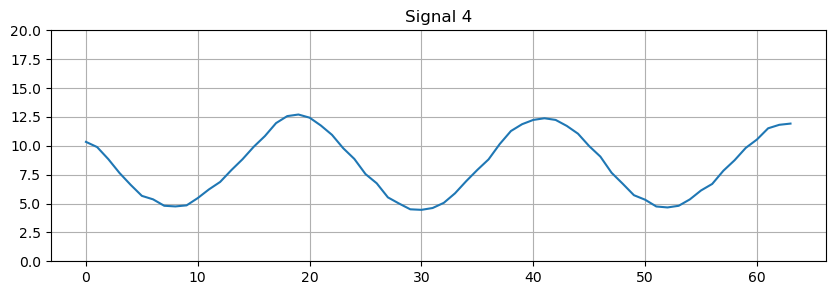

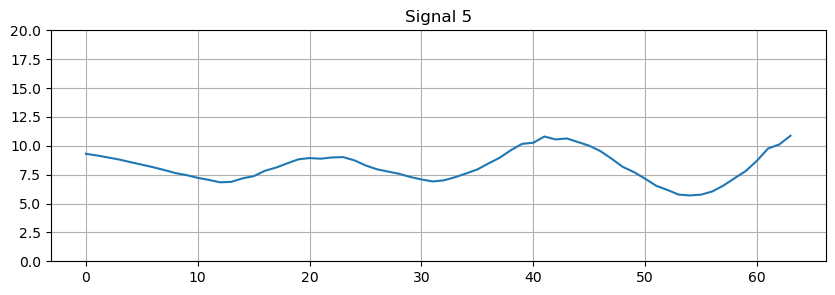

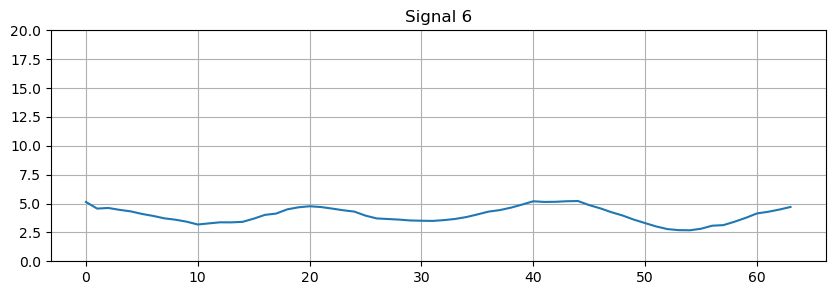

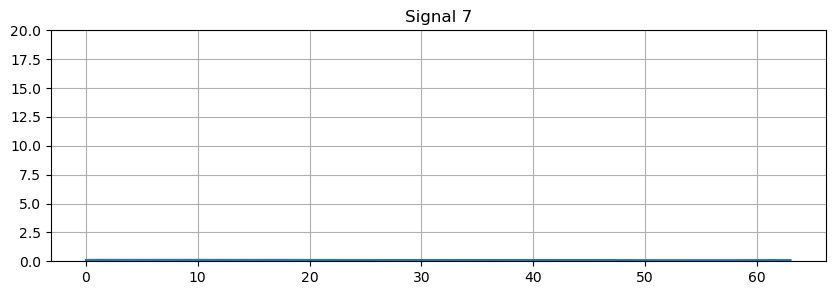

In [ ]:
for i in range(sequences.shape[-1]):
    plt.figure(figsize=(10, 3))
    plt.plot(sequences[0, :, i])
    plt.title(f"Signal {i+1}")
    plt.grid()
    plt.ylim((0, 20))
    plt.show()


(0.0, 20.0)

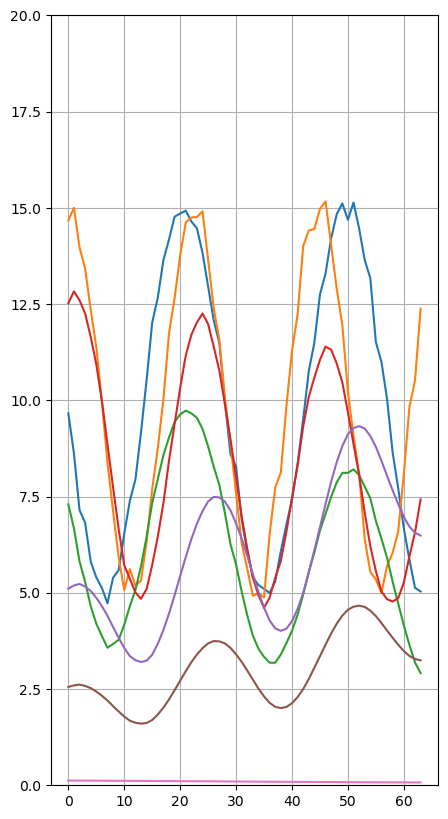

In [ ]:
plt.figure(figsize=(5, 10))

plt.plot(content_batch[0])
plt.grid()
plt.ylim((0, 20))

(0.0, 20.0)

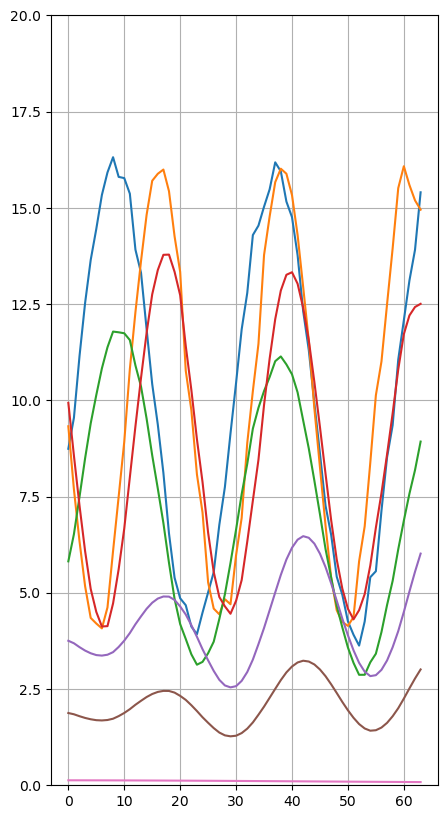

In [ ]:
plt.figure(figsize=(5, 10))

plt.plot(style2_batch[0])
plt.grid()
plt.ylim((0, 20))